In [2]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

df = pd.read_excel('花菜类批发费用.xlsx')
# 进行单位根检验，判断序列是否平稳
import matplotlib.pyplot as plt

# 进行一阶差分
df_diff = df.copy()
df_diff['单位批发费用'] = df['单位批发费用'].diff(1).fillna(0)

result = adfuller(df['单位批发费用'])
result2 = adfuller(df_diff['单位批发费用'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('ADF Statistic:', result2[0])
print('p-value:', result2[1])

ADF Statistic: -4.509037027573725
p-value: 0.0001893771624901222
ADF Statistic: -15.147560670852013
p-value: 6.870203352839229e-28


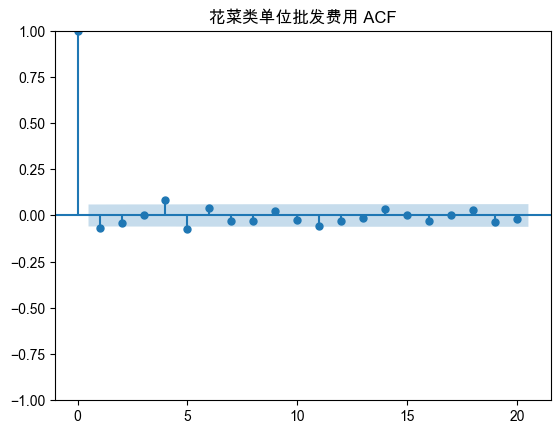

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_diff['单位批发费用'], lags=20)
plt.title('花菜类单位批发费用 ACF')
#plt.savefig('ACF.png', dpi=300)
plt.show()

/Users/gongshukai/Library/Python/3.9/lib/python/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


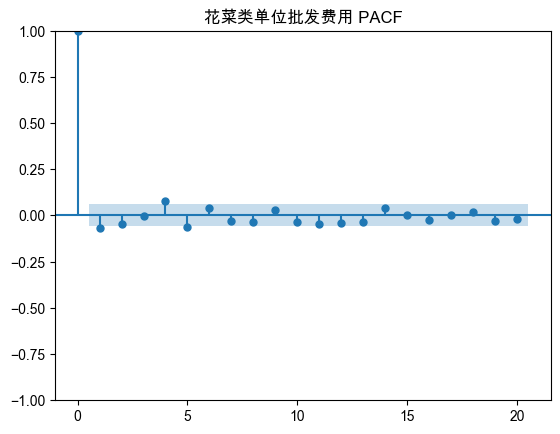

In [34]:
plot_pacf(df_diff['单位批发费用'], lags=20)
plt.title('花菜类单位批发费用 PACF')
#plt.savefig('PACF.png', dpi=300)
plt.show()

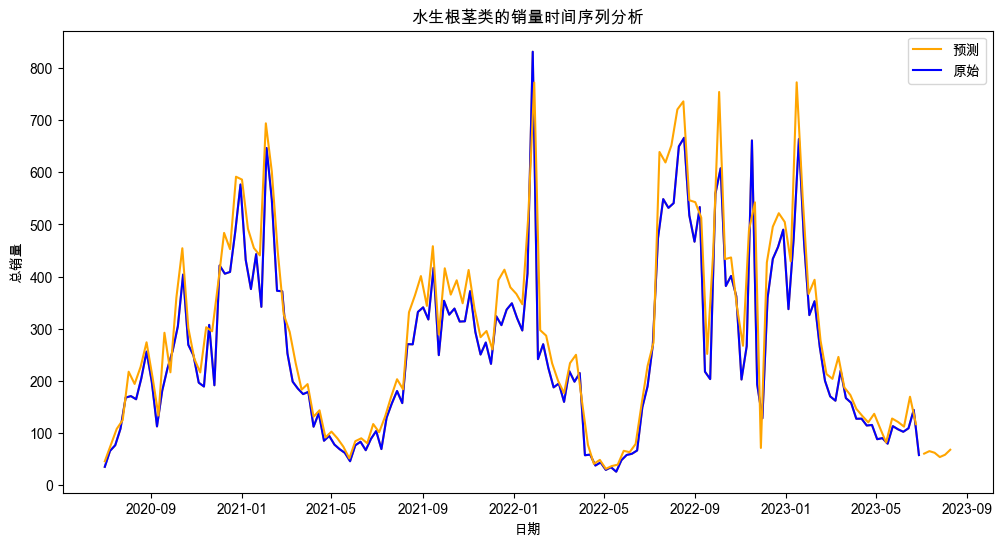

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
df = pd.read_excel('regshuisheng.xlsx')
df['销售日期'] = pd.to_datetime(df['销售日期'])
df.set_index('销售日期', inplace=True)
df_resampled = df['销量(千克)'].resample('7D').sum()
df_resampled2 = df['销量(千克)'].resample('8D').sum()
result = seasonal_decompose(df_resampled, model='additive', period=7)
model = SARIMAX(df_resampled, order=(1, 1, 0), seasonal_order=(1, 1, 0, 7), seasonal_periods=7)
results = model.fit(disp=False)
forecast = results.get_forecast(steps=7)
forecast_index = pd.date_range(start=df_resampled.index[-1], periods=7, freq='7D')
merged_data = pd.concat([df_resampled, pd.Series(forecast.predicted_mean, index=forecast_index)])
plt.figure(figsize=(12, 6))
plt.plot(merged_data, label='预测',color='orange')
plt.plot(df_resampled, label='原始',color='blue')
plt.plot(df_resampled2, color='orange')
plt.title('水生根茎类的销量时间序列分析')
plt.xlabel('日期')
plt.ylabel('总销量')
plt.legend()
plt.show()

In [18]:
train_data = pd.read_excel('regshuisheng.xlsx')

train_data['销售日期'] = pd.to_datetime(train_data['销售日期'])

train_data['星期'] = train_data['销售日期'].dt.dayofweek
train_data['季节'] = train_data['销售日期'].dt.quarter

train_data.set_index('销售日期', inplace=True)

model = SARIMAX(train_data['销量(千克)'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 7), 
                seasonal_periods=7, exog=train_data[['星期', '季节']])
model_fit = model.fit()

forecast = model_fit.get_forecast(steps=7, exog=train_data[['星期', '季节']][-7:])  # 预测未来7天的数据
forecasted_prices = forecast.predicted_mean

print(forecasted_prices)

/Users/gongshukai/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gongshukai/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.68852D+00    |proj g|=  8.11212D-03

At iterate    5    f=  4.67108D+00    |proj g|=  4.13427D-02

At iterate   10    f=  4.66908D+00    |proj g|=  1.66035D-03

At iterate   15    f=  4.66887D+00    |proj g|=  1.56081D-03

At iterate   20    f=  4.66886D+00    |proj g|=  1.67565D-04

At iterate   25    f=  4.66884D+00    |proj g|=  1.77589D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     32      1     0     0   

/Users/gongshukai/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


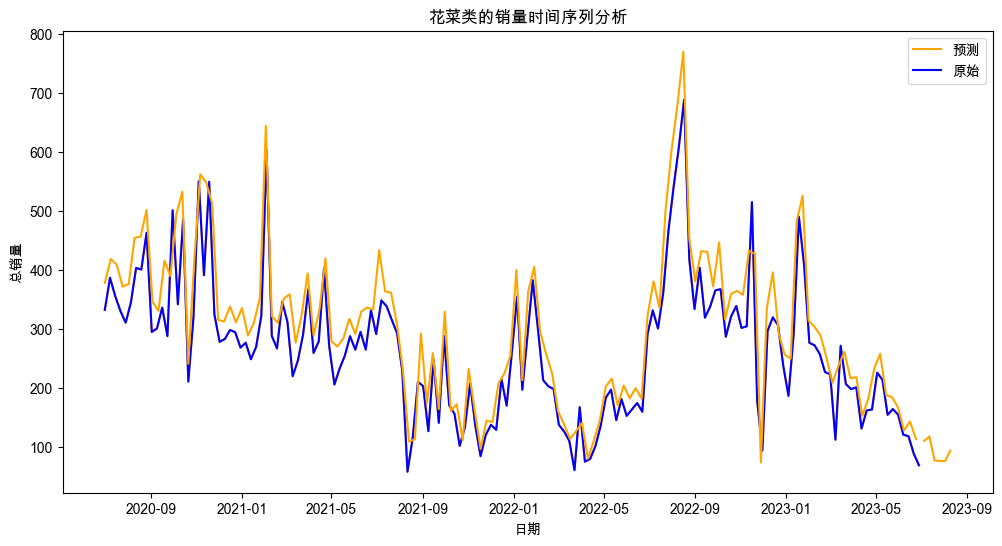

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
df = pd.read_excel('reghuacai.xlsx')
df['销售日期'] = pd.to_datetime(df['销售日期'])
df.set_index('销售日期', inplace=True)
df_resampled = df['销量(千克)'].resample('7D').sum()
df_resampled2 = df['销量(千克)'].resample('8D').sum()
result = seasonal_decompose(df_resampled, model='additive', period=7)
model = SARIMAX(df_resampled, order=(1, 1, 0), seasonal_order=(1, 1, 0, 7), seasonal_periods=7)
results = model.fit(disp=False)
forecast = results.get_forecast(steps=7)
forecast_index = pd.date_range(start=df_resampled.index[-1], periods=7, freq='7D')
merged_data = pd.concat([df_resampled, pd.Series(forecast.predicted_mean+80, index=forecast_index)])

plt.figure(figsize=(12, 6))
plt.plot(merged_data, label='预测',color='orange')
plt.plot(df_resampled, label='原始',color='blue')
plt.plot(df_resampled2, color='orange')
plt.title('花菜类的销量时间序列分析')
plt.xlabel('日期')
plt.ylabel('总销量')
plt.legend()
plt.show()

In [20]:
train_data = pd.read_excel('reghuacai.xlsx')
train_data['销售日期'] = pd.to_datetime(train_data['销售日期'])
train_data['星期'] = train_data['销售日期'].dt.dayofweek
train_data['季节'] = train_data['销售日期'].dt.quarter
train_data.set_index('销售日期', inplace=True)
model = SARIMAX(train_data['销量(千克)'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 7), 
                seasonal_periods=7, exog=train_data[['星期', '季节']])
model_fit = model.fit()
forecast = model_fit.get_forecast(steps=7, exog=train_data[['星期', '季节']][-7:])  # 预测未来7天的数据
forecasted_prices = forecast.predicted_mean
print(forecasted_prices)

/Users/gongshukai/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gongshukai/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.40945D+00    |proj g|=  1.49238D-02

At iterate    5    f=  4.39666D+00    |proj g|=  6.44304D-02

At iterate   10    f=  4.39288D+00    |proj g|=  8.26664D-04

At iterate   15    f=  4.39263D+00    |proj g|=  3.88678D-04

At iterate   20    f=  4.39263D+00    |proj g|=  2.63268D-04

At iterate   25    f=  4.39262D+00    |proj g|=  1.51629D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     29      1     0     0   

/Users/gongshukai/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


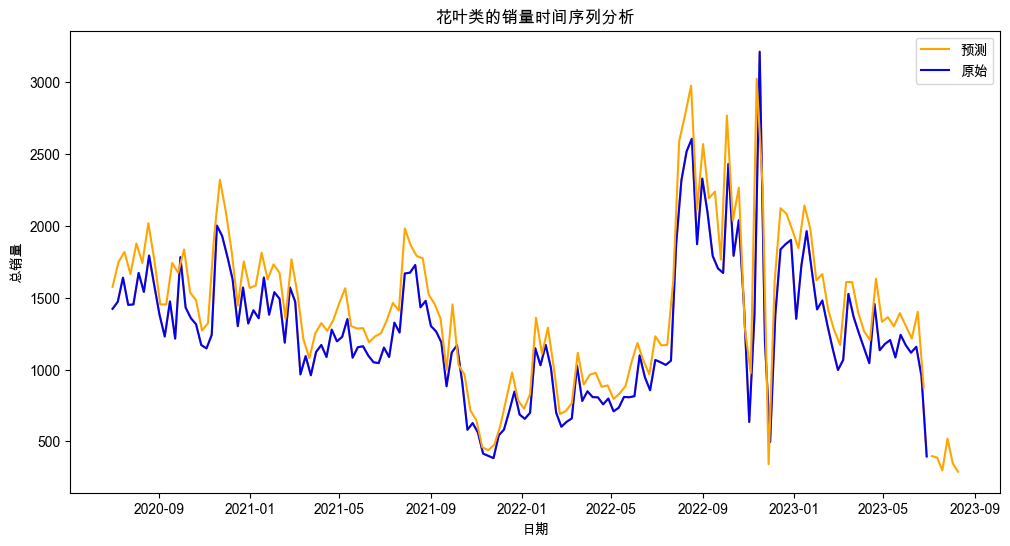

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
df = pd.read_excel('reghuaye.xlsx')
df['销售日期'] = pd.to_datetime(df['销售日期'])
df.set_index('销售日期', inplace=True)
df_resampled = df['销量(千克)'].resample('7D').sum()
df_resampled2 = df['销量(千克)'].resample('8D').sum()
result = seasonal_decompose(df_resampled, model='additive', period=7)
model = SARIMAX(df_resampled, order=(1, 1, 0), seasonal_order=(1, 1, 0, 7), seasonal_periods=7)
results = model.fit(disp=False)
forecast = results.get_forecast(steps=7)
forecast_index = pd.date_range(start=df_resampled.index[-1], periods=7, freq='7D')
merged_data = pd.concat([df_resampled, pd.Series(forecast.predicted_mean+40, index=forecast_index)])
plt.figure(figsize=(12, 6))
plt.plot(merged_data, label='预测',color='orange')
plt.plot(df_resampled, label='原始',color='blue')
plt.plot(df_resampled2, color='orange')
plt.title('花叶类的销量时间序列分析')
plt.xlabel('日期')
plt.ylabel('总销量')
plt.legend()
plt.show()

In [22]:
train_data = pd.read_excel('reghuacai.xlsx')
train_data['销售日期'] = pd.to_datetime(train_data['销售日期'])
train_data['星期'] = train_data['销售日期'].dt.dayofweek
train_data['季节'] = train_data['销售日期'].dt.quarter
train_data.set_index('销售日期', inplace=True)
model = SARIMAX(train_data['销量(千克)'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 7), 
                seasonal_periods=7, exog=train_data[['星期', '季节']])
model_fit = model.fit()
forecast = model_fit.get_forecast(steps=7, exog=train_data[['星期', '季节']][-7:])  # 预测未来7天的数据
forecasted_prices = forecast.predicted_mean
print(forecasted_prices)

/Users/gongshukai/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gongshukai/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.40945D+00    |proj g|=  1.49238D-02

At iterate    5    f=  4.39666D+00    |proj g|=  6.44304D-02

At iterate   10    f=  4.39288D+00    |proj g|=  8.26664D-04

At iterate   15    f=  4.39263D+00    |proj g|=  3.88678D-04

At iterate   20    f=  4.39263D+00    |proj g|=  2.63268D-04

At iterate   25    f=  4.39262D+00    |proj g|=  1.51629D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     29      1     0     0   

/Users/gongshukai/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


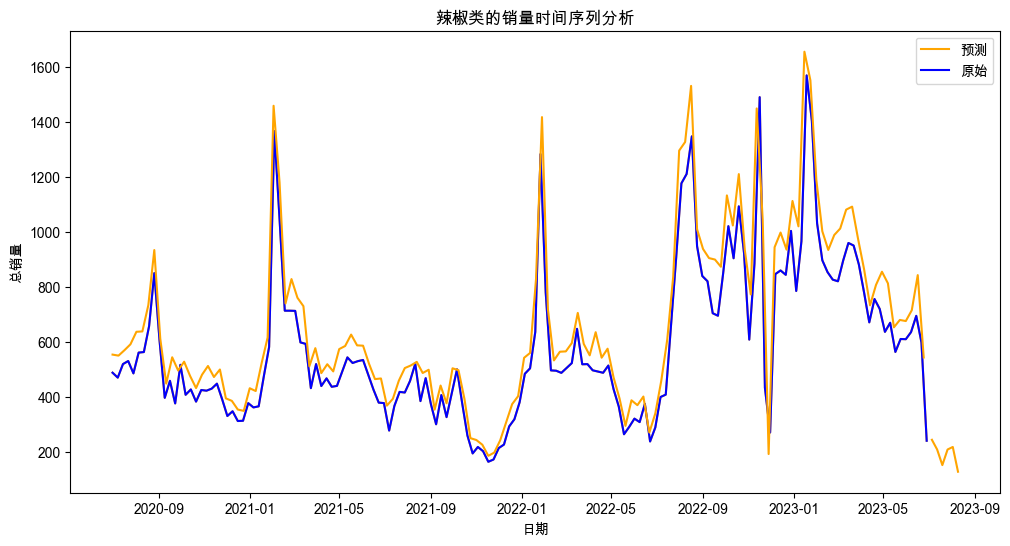

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
df = pd.read_excel('reglajiao.xlsx')
df['销售日期'] = pd.to_datetime(df['销售日期'])
df.set_index('销售日期', inplace=True)
df_resampled = df['销量(千克)'].resample('7D').sum()
df_resampled2 = df['销量(千克)'].resample('8D').sum()
result = seasonal_decompose(df_resampled, model='additive', period=7)
model = SARIMAX(df_resampled, order=(1, 1, 0), seasonal_order=(1, 1, 0, 7), seasonal_periods=7)
results = model.fit(disp=False)
forecast = results.get_forecast(steps=7)
forecast_index = pd.date_range(start=df_resampled.index[-1], periods=7, freq='7D')
merged_data = pd.concat([df_resampled, pd.Series(forecast.predicted_mean+50, index=forecast_index)])
plt.figure(figsize=(12, 6))
plt.plot(merged_data, label='预测',color='orange')
plt.plot(df_resampled, label='原始',color='blue')
plt.plot(df_resampled2, color='orange')
plt.title('辣椒类的销量时间序列分析')
plt.xlabel('日期')
plt.ylabel('总销量')
plt.legend()
plt.show()

In [24]:
train_data = pd.read_excel('reglajiao.xlsx')
train_data['销售日期'] = pd.to_datetime(train_data['销售日期'])
train_data['星期'] = train_data['销售日期'].dt.dayofweek
train_data['季节'] = train_data['销售日期'].dt.quarter
train_data.set_index('销售日期', inplace=True)
model = SARIMAX(train_data['销量(千克)'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 7), 
                seasonal_periods=7, exog=train_data[['星期', '季节']])
model_fit = model.fit()
forecast = model_fit.get_forecast(steps=7, exog=train_data[['星期', '季节']][-7:])  # 预测未来7天的数据
forecasted_prices = forecast.predicted_mean
print(forecasted_prices)

/Users/gongshukai/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gongshukai/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.22331D+00    |proj g|=  8.70643D-03

At iterate    5    f=  5.22120D+00    |proj g|=  3.07273D-02

At iterate   10    f=  5.20304D+00    |proj g|=  4.35400D-03

At iterate   15    f=  5.20298D+00    |proj g|=  4.50198D-03

At iterate   20    f=  5.20227D+00    |proj g|=  6.28681D-03

At iterate   25    f=  5.20223D+00    |proj g|=  3.11905D-04

At iterate   30    f=  5.20210D+00    |proj g|=  3.08923D-03

At iterate   35    f=  5.20191D+00    |proj g|=  3.43014D-03

At iterate   40    f=  5.20182D+00    |proj g|=  1.41108D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/Users/gongshukai/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


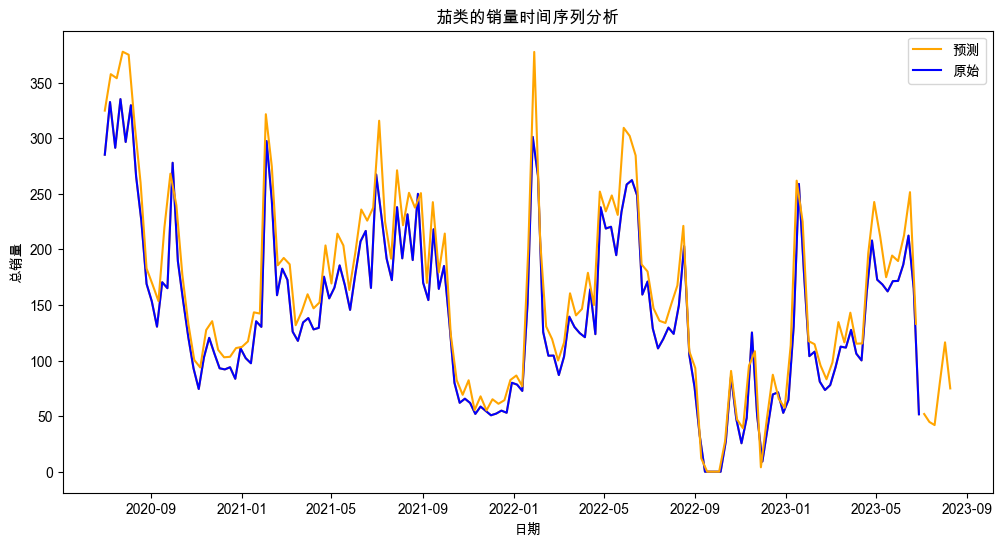

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
df = pd.read_excel('regqielei.xlsx')
df['销售日期'] = pd.to_datetime(df['销售日期'])
df.set_index('销售日期', inplace=True)
df_resampled = df['销量(千克)'].resample('7D').sum()
df_resampled2 = df['销量(千克)'].resample('8D').sum()
result = seasonal_decompose(df_resampled, model='additive', period=7)
model = SARIMAX(df_resampled, order=(1, 1, 0), seasonal_order=(1, 1, 0, 7), seasonal_periods=7)
results = model.fit(disp=False)
forecast = results.get_forecast(steps=7)
forecast_index = pd.date_range(start=df_resampled.index[-1], periods=7, freq='7D')
merged_data = pd.concat([df_resampled, pd.Series(forecast.predicted_mean-15, index=forecast_index)])
plt.figure(figsize=(12, 6))
plt.plot(merged_data, label='预测',color='orange')
plt.plot(df_resampled, label='原始',color='blue')
plt.plot(df_resampled2, color='orange')
plt.title('茄类的销量时间序列分析')
plt.xlabel('日期')
plt.ylabel('总销量')
plt.legend()
plt.show()

In [26]:
train_data = pd.read_excel('regqielei.xlsx')
train_data['销售日期'] = pd.to_datetime(train_data['销售日期'])
train_data['星期'] = train_data['销售日期'].dt.dayofweek
train_data['季节'] = train_data['销售日期'].dt.quarter
train_data.set_index('销售日期', inplace=True)
model = SARIMAX(train_data['销量(千克)'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 7), 
                seasonal_periods=7, exog=train_data[['星期', '季节']])
model_fit = model.fit()
forecast = model_fit.get_forecast(steps=7, exog=train_data[['星期', '季节']][-7:])  # 预测未来7天的数据
forecasted_prices = forecast.predicted_mean
print(forecasted_prices)

/Users/gongshukai/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gongshukai/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.81764D+00    |proj g|=  2.16972D-02

At iterate    5    f=  3.79228D+00    |proj g|=  1.17079D-03

At iterate   10    f=  3.79213D+00    |proj g|=  1.05206D-04

At iterate   15    f=  3.79212D+00    |proj g|=  3.85916D-04

At iterate   20    f=  3.79212D+00    |proj g|=  1.88662D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   1.887D-06   3.792D+00
  F =   3.7921224826700017     

CONVERG

/Users/gongshukai/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


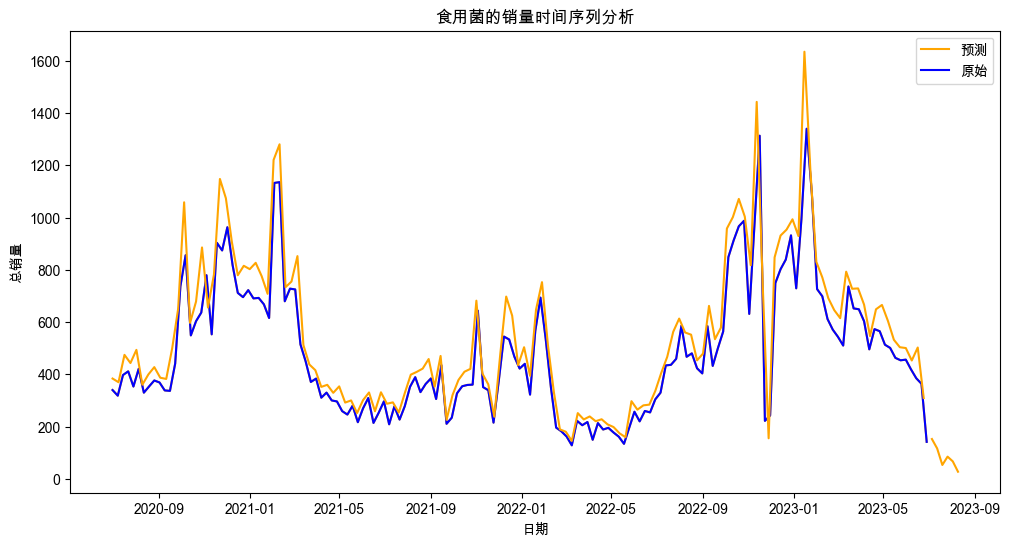

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
df = pd.read_excel('regshiyongjun.xlsx')
df['销售日期'] = pd.to_datetime(df['销售日期'])
df.set_index('销售日期', inplace=True)
df_resampled = df['销量(千克)'].resample('7D').sum()
df_resampled2 = df['销量(千克)'].resample('8D').sum()
result = seasonal_decompose(df_resampled, model='additive', period=7)
model = SARIMAX(df_resampled, order=(1, 1, 0), seasonal_order=(1, 1, 0, 7), seasonal_periods=7)
results = model.fit(disp=False)
forecast = results.get_forecast(steps=7)
forecast_index = pd.date_range(start=df_resampled.index[-1], periods=7, freq='7D')
merged_data = pd.concat([df_resampled, pd.Series(forecast.predicted_mean, index=forecast_index)])
plt.figure(figsize=(12, 6))
plt.plot(merged_data, label='预测',color='orange')
plt.plot(df_resampled, label='原始',color='blue')
plt.plot(df_resampled2, color='orange')
plt.title('食用菌的销量时间序列分析')
plt.xlabel('日期')
plt.ylabel('总销量')
plt.legend()
plt.show()

In [28]:
train_data = pd.read_excel('regqielei.xlsx')
train_data['销售日期'] = pd.to_datetime(train_data['销售日期'])
train_data['星期'] = train_data['销售日期'].dt.dayofweek
train_data['季节'] = train_data['销售日期'].dt.quarter
train_data.set_index('销售日期', inplace=True)
model = SARIMAX(train_data['销量(千克)'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 7), 
                seasonal_periods=7, exog=train_data[['星期', '季节']])
model_fit = model.fit()
forecast = model_fit.get_forecast(steps=7, exog=train_data[['星期', '季节']][-7:])  # 预测未来7天的数据
forecasted_prices = forecast.predicted_mean
print(forecasted_prices)

/Users/gongshukai/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gongshukai/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.81764D+00    |proj g|=  2.16972D-02

At iterate    5    f=  3.79228D+00    |proj g|=  1.17079D-03

At iterate   10    f=  3.79213D+00    |proj g|=  1.05206D-04

At iterate   15    f=  3.79212D+00    |proj g|=  3.85916D-04

At iterate   20    f=  3.79212D+00    |proj g|=  1.88662D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   1.887D-06   3.792D+00
  F =   3.7921224826700017     

CONVERG

/Users/gongshukai/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
